In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_kOBLwZA.csv')

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.shape

(8523, 12)

In [5]:
# check for missing values in data set
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()),inplace=True)

In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train['Outlet_Size'].fillna((train['Outlet_Size'].mode()[0]),inplace=True)

In [9]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
X=train[['Outlet_Establishment_Year','Item_MRP']]

In [11]:
X.shape

(8523, 2)

In [12]:
y=train['Item_Outlet_Sales']

In [13]:
# spliting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [14]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [15]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
pred=lreg.predict(X_test)

In [17]:
lreg.coef_

array([-11.86198797,  15.69001104])

In [18]:
mse=mean_squared_error(y_test,pred)

In [19]:
mse

1992779.366424412

In [20]:
print('the value of mse is',mse)

the value of mse is 1992779.366424412


In [21]:
# calculating coefficients
coeff=pd.DataFrame(X_train.columns)
coeff['coeffucient Estimation']=lreg.coef_

In [22]:
coeff

,0,coeffucient Estimation
0,Outlet_Establishment_Year,-11.861988
1,Item_MRP,15.690011


In [23]:
# from above result we can say that MRP has a high coefficient,meaning items having higher prices have better sales.

### EVALUATING YOUR MODEL - R SQUARE AND ADJUSTED R- SQUARE

How accurate do you think the model is? Do we have any evaluation metric, so that we can check this? Actually we have a quantity, known as R-Square. R-Square: It determines how much of the total variation in Y (dependent variable) is explained by the variation in X (independent variable). Mathematically, it can be written as:
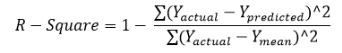

The value of R-square is always between 0 and 1, where 0 means that the model does not model explain any variability in the target variable (Y) and 1 meaning it explains full variability in the target variable. Now let us check the r-square for the above model. lreg.score(x_cv,y_cv) 0.3287 In this case, R² is 32%, meaning, only 32% of variance in sales is explained by year of establishment and MRP. In other words, if you know year of establishment and the MRP, you’ll have 32% information to make an accurate prediction about its sales. Now what would happen if I introduce one more feature in my model, will my model predict values more closely to its actual value? Will the value of R-Square increase? Let us consider another case.

### Model 2 - Linear regression with more variables

We learnt, by using two variables rather than one, we improved the ability to make accurate predictions about the item sales. So, let us introduce another feature ‘weight’ in case 3. Now let’s build a regression model with these three features.

In [24]:
X=train[['Outlet_Establishment_Year','Item_MRP','Item_Weight']]

In [25]:
y=train[['Item_Outlet_Sales']]

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [27]:
X_train.shape,y_train.shape

((5966, 3), (5966, 1))

In [28]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred1=lreg.predict(X_test)

In [30]:
lreg.coef_,lreg.intercept_

(array([[-11.29882559,  15.72427754,   0.45072052]]), array([22537.23064007]))

In [31]:
from sklearn.metrics import r2_score
lreg.score(X_test,y_test)

0.30388631650208675

In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred1)

In [33]:
print('the value of mse is',mse)

the value of mse is 2048209.7161933945


### Adjusted R-square

The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate? That is why, we use “Adjusted R-Square”. The Adjusted R-Square is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.
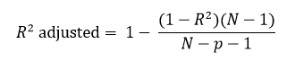

### USING ALL THE FEATURES FOR PREDICTION

Now let us built a model containing all the features. While building the regression models, I have only used continuous features. This is because we need to treat categorical variables differently before they can used in linear regression model. There are different techniques to treat them, here I have used one hot encoding(convert each class of a categorical variable as a feature). Other than that I have also imputed the missing values for outlet size.

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [35]:
train.drop('Item_Identifier',axis=1,inplace=True)

In [36]:
train.Item_Visibility.value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
0.134976      2
0.107224      2
0.085275      2
0.076856      2
0.059836      2
0.112203      2
0.044024      2
0.072253      2
0.061271      2
0.061164      2
0.145266      2
0.081097      2
0.071958      2
0.103442      2
0.074613      2
0.072655      2
0.071833      2
0.136286      2
0.041355      2
0.026950      2
0.013952      2
0.160624      2
0.080640      2
0.097611      2
0.096592      2
           ... 
0.100641      1
0.122735      1
0.099024      1
0.054600      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.030921      1
0.081119      1
0.052811      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, L

In [37]:
train['Item_Visibility']=train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))

In [38]:
train.Item_Visibility.value_counts()

0.066132    526
0.076975      3
0.096592      2
0.104784      2
0.058919      2
0.076792      2
0.061425      2
0.023466      2
0.112399      2
0.159721      2
0.128296      2
0.093308      2
0.072411      2
0.074931      2
0.041355      2
0.071833      2
0.097457      2
0.136286      2
0.078759      2
0.080625      2
0.085622      2
0.013952      2
0.079806      2
0.106539      2
0.093914      2
0.014048      2
0.026895      2
0.080969      2
0.122016      2
0.072285      2
           ... 
0.021240      1
0.100641      1
0.030921      1
0.118859      1
0.162572      1
0.076745      1
0.015461      1
0.057655      1
0.042113      1
0.029565      1
0.066447      1
0.035954      1
0.083222      1
0.021413      1
0.099024      1
0.052811      1
0.122735      1
0.118080      1
0.046654      1
0.021469      1
0.060134      1
0.096658      1
0.019064      1
0.164197      1
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.081119      1
0.037218      1
Name: Item_Visibility, L

In [39]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


In [41]:
train.drop('Outlet_Identifier',axis=1,inplace=True)

In [42]:
train1=pd.get_dummies(train,drop_first=True)

In [43]:
train1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.066132,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.066132,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [44]:
X=train1.drop('Item_Outlet_Sales',axis=1)

In [45]:
y=train1['Item_Outlet_Sales']

In [46]:
X.shape,y.shape

((8523, 30), (8523,))

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [48]:
X_train.shape,y_train.shape

((5966, 30), (5966,))

In [49]:
lreg=LinearRegression()

In [50]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
pred2=lreg.predict(X_test)

In [52]:
lreg.score(X_test,y_test)

0.5568211901681224

In [53]:
lreg.coef_

array([ 9.24819523e-01, -3.44608909e+02,  1.57863163e+01,  4.75397039e+01,
        4.49053167e+00,  5.09547369e+01, -3.81147317e+01, -2.54077698e+01,
        1.18040081e+01, -1.43806254e+01,  9.75641910e+00, -9.02197211e+01,
       -5.87622450e+01, -3.56374117e+00, -1.78639788e+01,  5.65169260e+01,
       -7.51707985e+01, -3.96137545e+01,  1.49794608e+01,  2.13192165e+02,
       -3.15211622e+01, -5.63776208e+01,  1.32948638e+02, -1.02711386e+03,
       -9.36850906e+02, -3.12912242e+02, -5.14324261e+02,  1.40631477e+03,
        1.06952838e+03,  3.98084186e+03])

In [54]:
# let's check MSE
mse=mean_squared_error(y_test,pred2)

In [55]:
print('the value of mse is',mse)

the value of mse is 1233884.8390584763


In [56]:
coeff=pd.DataFrame(X_train.columns)
coeff['Estimated Coefficient']=lreg.coef_

In [57]:
coeff

,0,Estimated Coefficient
0,Item_Weight,0.924820
1,Item_Visibility,-344.608909
2,Item_MRP,15.786316
3,Outlet_Establishment_Year,47.539704
4,Item_Fat_Content_Low Fat,4.490532
5,Item_Fat_Content_Regular,50.954737
6,Item_Fat_Content_low fat,-38.114732
7,Item_Fat_Content_reg,-25.407770
8,Item_Type_Breads,11.804008
9,Item_Type_Breakfast,-14.380625


Clearly, we can see that there is a great improvement in both mse and R-square, which means that our model now is able to predict much closer values to the actual values.

### Interpretation of Regression Plots

Take a look at the residual Vs fitted values plot

Text(0.5, 1.0, 'residual plot')

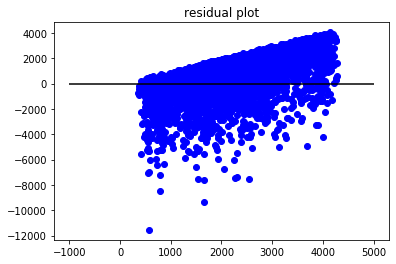

In [58]:
# Residual Plot
X_plot=plt.scatter(pred,(pred-y_test),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.title('residual plot')


Text(0.5, 1.0, 'residual plot')

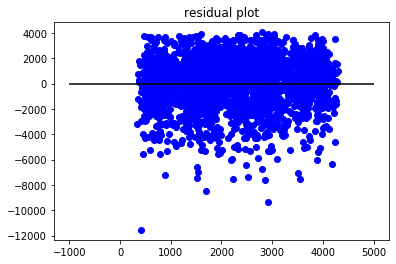

In [59]:
# Residual Plot
X_plot=plt.scatter(pred1,(pred-y_test),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.title('residual plot')


Text(0.5, 1.0, 'residual plot')

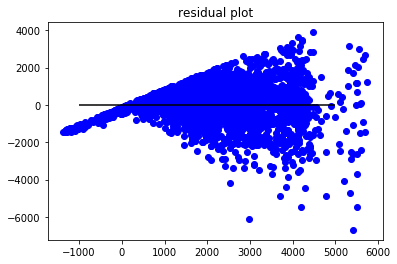

In [60]:
# Residual Plot
X_plot=plt.scatter(pred2,(pred2-y_test),c='b')
plt.hlines(y=0,xmin=-1000,xmax=5000)
plt.title('residual plot')


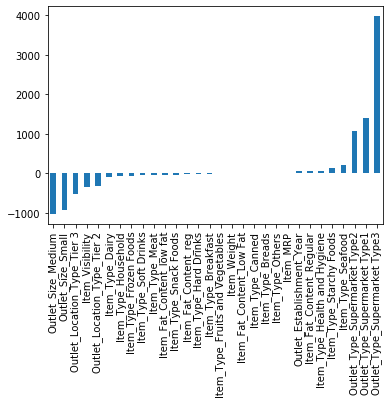

In [61]:
from pandas import Series
coeff=pd.DataFrame(X_train.columns)
coeff['Estimated Coefficient']=Series(lreg.coef_,X_train.columns).sort_values().plot(kind='bar')

We can see that coefficient of Outlet_Type_Supermarket_Type3 is much higher as compare to rest of the coefficients.
therefore the total sales of an Item would be more driven by this feature.